# 분석

In [1]:
import pandas as pd 
import numpy as np 
from scipy import stats
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import signal

In [2]:
ls=sorted(glob.glob("4*.xlsx"))
print(ls)
print(len(ls))


['40treatment.xlsx', '41 control.xlsx']
2


In [5]:
pd.read_excel(ls[0]).head() #피험자 번호 101A의 뇌파데이터 확인

,o1_alpha,o2_alpha,fp1_alpha,fp2_alpha,occ_blocking,occ_asymmetry,fp_asymmetry,time(0.01sec)
0,0.005889,-0.011917,-0.007374,0.010753,-0.006027,2.954098,5.365273,0
1,0.064498,0.062724,0.014121,0.059355,0.127223,-0.013946,0.615626,1
2,0.043966,0.100534,0.002955,0.008204,0.144499,0.391477,0.470412,2
3,0.126061,0.187516,0.032086,0.056811,0.313577,0.195982,0.278133,3
4,0.271396,0.144742,0.003587,0.025015,0.416138,-0.304354,0.749168,4


In [4]:
#n1=pd.read_excel(ls[0])
#n2=pd.read_excel(ls[1])
#n3=pd.read_excel(ls[2])
n4=pd.read_excel(ls[1])
#n5=pd.read_excel(ls[4])

y=pd.read_excel(ls[0])

In [3]:
import numpy

def smooth(x,window_len=11,window='hanning'):

    if x.ndim != 1:
        raise ValueError ("smooth only accepts 1 dimension arrays.")

    if x.size < window_len:
        raise ValueError ("Input vector needs to be bigger than window size.")


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError ("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")


    s=numpy.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=numpy.ones(window_len,'d')
    else:
        w=eval('numpy.'+window+'(window_len)')

    y=numpy.convolve(w/w.sum(),s,mode='valid')
    return y


## 1. Attention Index

In [13]:
W=555
O=3
aiy=signal.savgol_filter(-(y.fp1_alpha)**2,W,O)
#ain1=signal.savgol_filter(-(n1.fp1_alpha)**2,W,O)
#ain2=signal.savgol_filter(-(n2.fp1_alpha)**2,W,O)
#ain3=signal.savgol_filter(-(n3.fp1_alpha)**2,W,O)
ain4=signal.savgol_filter(-(n4.fp1_alpha)**2,W,O)
#ain5=signal.savgol_filter(-(n5.fp1_alpha)**2,W,O)

In [14]:
len(y)

58909

In [15]:
len(n4)

58452

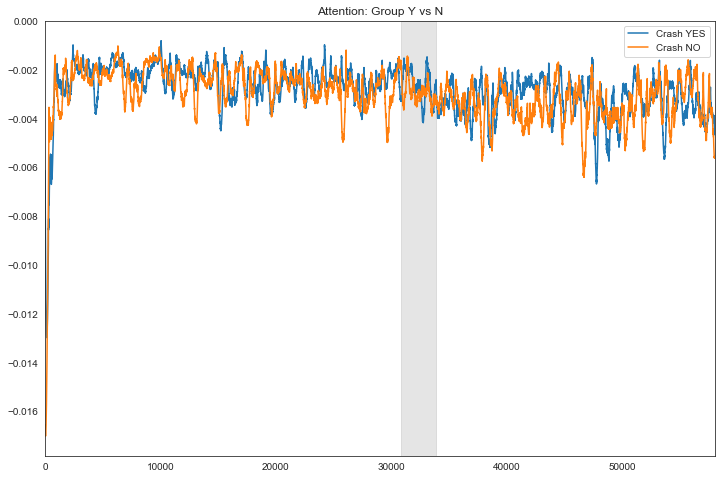

In [22]:
#Attention
result = pd.DataFrame({
                      'Crash YES': aiy[0:58000],
                     #  'recall NO': ain1,
                      #  'recall NO 2': ain2,
                       # 'recall NO 3': ain3,
                        'Crash NO ': ain4[0:58000],
                      #  'recall NO 5': ain5,
})

sns.set_style("white")
result.plot(title="Attention: Group Y vs N")

plt.axvspan(30832, 33832, color='gray', alpha=0.2)


plt.gcf().set_size_inches(12,8)

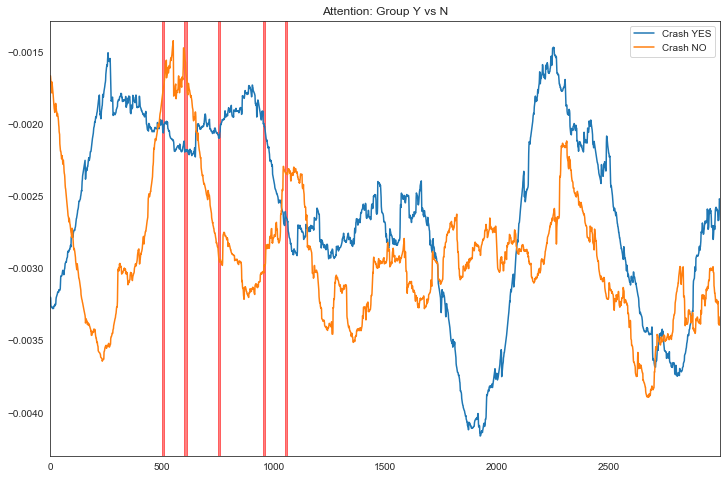

In [41]:
#Attention
result = pd.DataFrame({
                      'Crash YES': aiy[30832:33832],
                     #  'recall NO': ain1,
                      #  'recall NO 2': ain2,
                       # 'recall NO 3': ain3,
                        'Crash NO ': ain4[30832:33832],
                      #  'recall NO 5': ain5,
})

sns.set_style("white")
result.plot(title="Attention: Group Y vs N")

plt.axvspan(500, 510, color='red', alpha=0.5)
plt.axvspan(600, 610, color='red', alpha=0.5)
plt.axvspan(750, 760, color='red', alpha=0.5)
plt.axvspan(950, 960, color='red', alpha=0.5)
plt.axvspan(1050, 1060, color='red', alpha=0.5)




plt.gcf().set_size_inches(12,8)

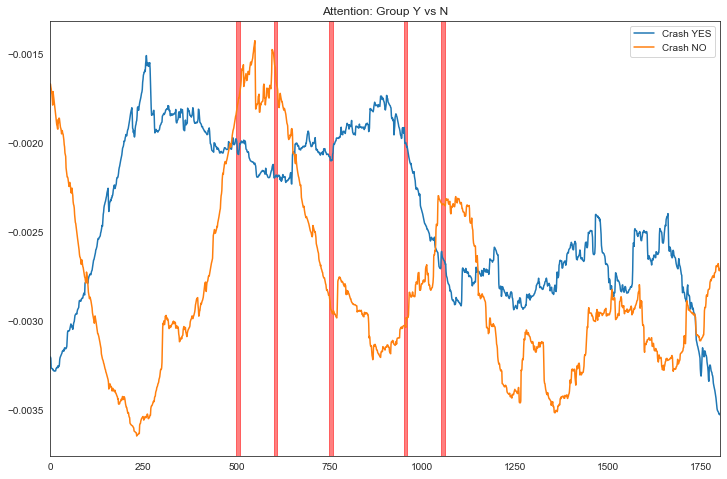

In [42]:
#Attention
result = pd.DataFrame({
                      'Crash YES': aiy[30832:32634],
                     #  'recall NO': ain1,
                      #  'recall NO 2': ain2,
                       # 'recall NO 3': ain3,
                        'Crash NO ': ain4[30832:32634],
                      #  'recall NO 5': ain5,
})

sns.set_style("white")
result.plot(title="Attention: Group Y vs N")

plt.axvspan(500, 510, color='red', alpha=0.5)
plt.axvspan(600, 610, color='red', alpha=0.5)
plt.axvspan(750, 760, color='red', alpha=0.5)
plt.axvspan(950, 960, color='red', alpha=0.5)
plt.axvspan(1050, 1060, color='red', alpha=0.5)




plt.gcf().set_size_inches(12,8)

## 2.Approach Index

In [43]:
awy=(y.fp2_alpha)**2-(y.fp1_alpha)**2
'''awn1=(n1.fp2_alpha)**2-(n1.fp1_alpha)**2
awn2=(n2.fp2_alpha)**2-(n2.fp1_alpha)**2
awn3=(((n3.fp2_alpha)**2)-(n3.fp1_alpha)**2)
'''
awn4=(((n4.fp2_alpha)**2)-(n4.fp1_alpha)**2)
#awn5=(((n5.fp2_alpha)**2)-(n5.fp1_alpha)**2)

W=555
O=3
awy=signal.savgol_filter(awy,W,O)
'''awn1=signal.savgol_filter(awn1,W,O)
awn2=signal.savgol_filter(awn2,W,O)
awn3=signal.savgol_filter(awn3,W,O)'''

awn4=signal.savgol_filter(awn4,W,O)
#awn5=signal.savgol_filter(awn5,W,O)

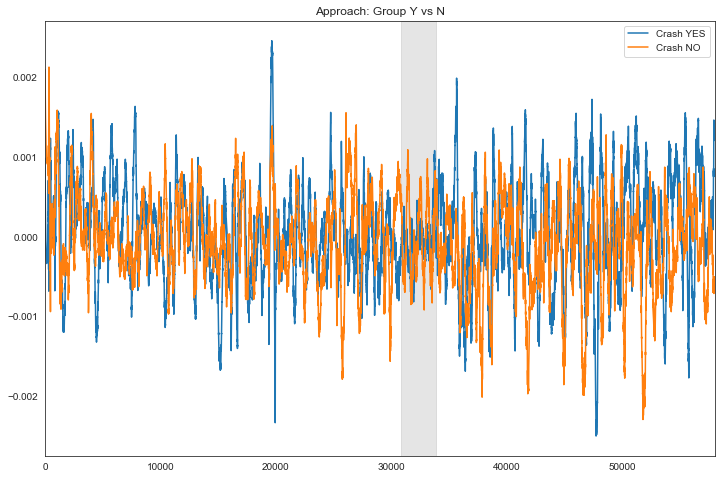

In [44]:
#Approach
result = pd.DataFrame({
                      'Crash YES': awy[:58000],
                     #  'recall NO': awn1,
                      #  'recall NO 2': awn2,
                       # 'recall NO 3': awn3,
                        'Crash NO ': awn4[:58000],
                      #  'recall NO 5': awn5,
})

sns.set_style("white")
result.plot(title="Approach: Group Y vs N")


plt.axvspan(30832, 33832, color='gray', alpha=0.2)



plt.gcf().set_size_inches(12,8)

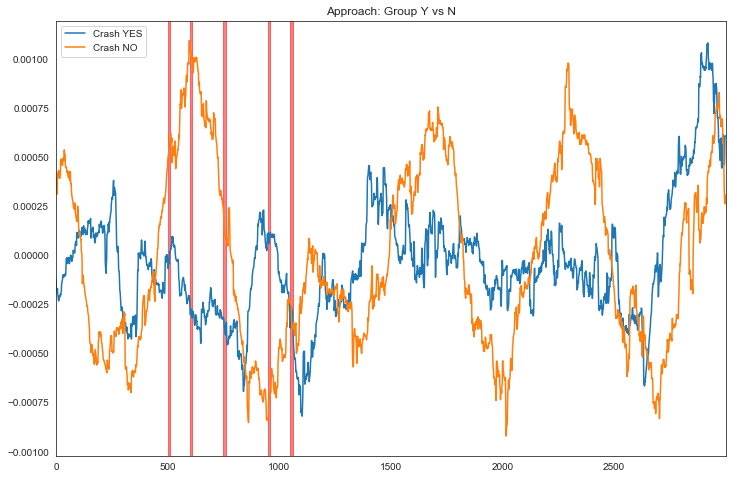

In [45]:
#Approach
result = pd.DataFrame({
                      'Crash YES': awy[30832:33832],
                     #  'recall NO': awn1,
                      #  'recall NO 2': awn2,
                       # 'recall NO 3': awn3,
                        'Crash NO ': awn4[30832:33832],
                      #  'recall NO 5': awn5,
})

sns.set_style("white")
result.plot(title="Approach: Group Y vs N")



plt.axvspan(500, 510, color='red', alpha=0.5)
plt.axvspan(600, 610, color='red', alpha=0.5)
plt.axvspan(750, 760, color='red', alpha=0.5)
plt.axvspan(950, 960, color='red', alpha=0.5)
plt.axvspan(1050, 1060, color='red', alpha=0.5)


plt.gcf().set_size_inches(12,8)

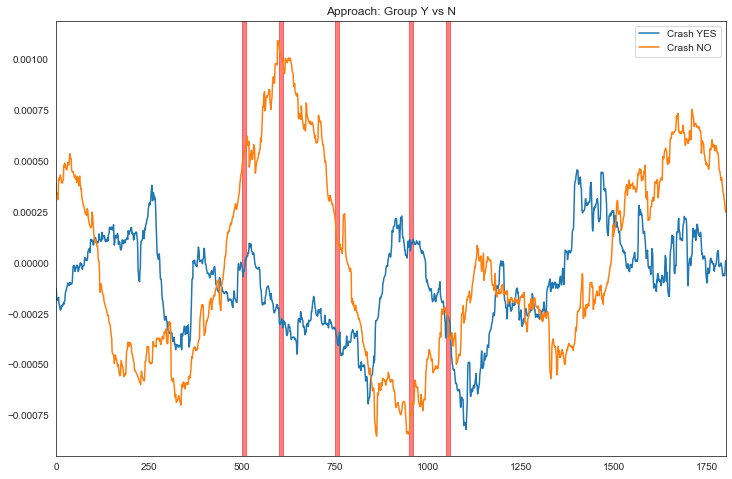

In [46]:
#Approach
result = pd.DataFrame({
                      'Crash YES': awy[30832:32634],
                     #  'recall NO': awn1,
                      #  'recall NO 2': awn2,
                       # 'recall NO 3': awn3,
                        'Crash NO ': awn4[30832:32634],
                      #  'recall NO 5': awn5,
})

sns.set_style("white")
result.plot(title="Approach: Group Y vs N")



plt.axvspan(500, 510, color='red', alpha=0.5)
plt.axvspan(600, 610, color='red', alpha=0.5)
plt.axvspan(750, 760, color='red', alpha=0.5)
plt.axvspan(950, 960, color='red', alpha=0.5)
plt.axvspan(1050, 1060, color='red', alpha=0.5)


plt.gcf().set_size_inches(12,8)

## 3. Occ. Alpha Blocking

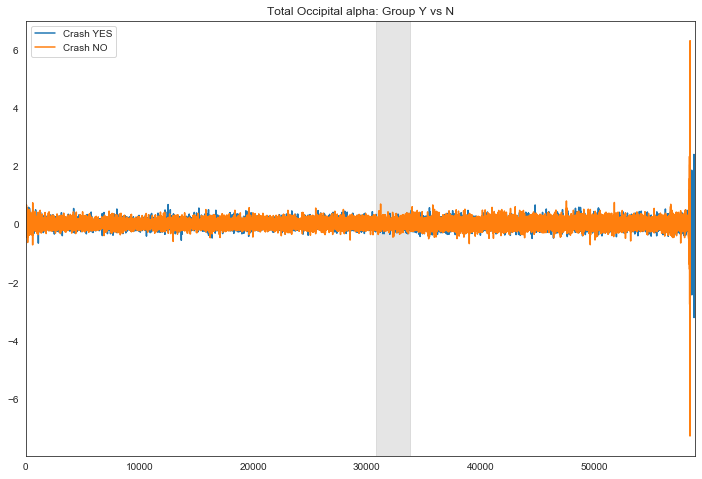

In [33]:

result = pd.DataFrame({
                      'Crash YES': y.occ_blocking,
                      # 'recall NO 1': ain1,
                       # 'recall NO 2': ain2,
                       # 'recall NO 3': ain3,
                        'Crash NO': n4.occ_blocking,
                       # 'recall NO 5': ain5,
})

sns.set_style("white")
result.plot(title="Total Occipital alpha: Group Y vs N")

plt.axvspan(30832, 33832, color='gray', alpha=0.2)

plt.gcf().set_size_inches(12,8)

In [34]:
N=150
ocy=smooth(y.occ_blocking,window_len=N,window='hanning')
ocn4=smooth(n4.occ_blocking,window_len=N,window='hanning')

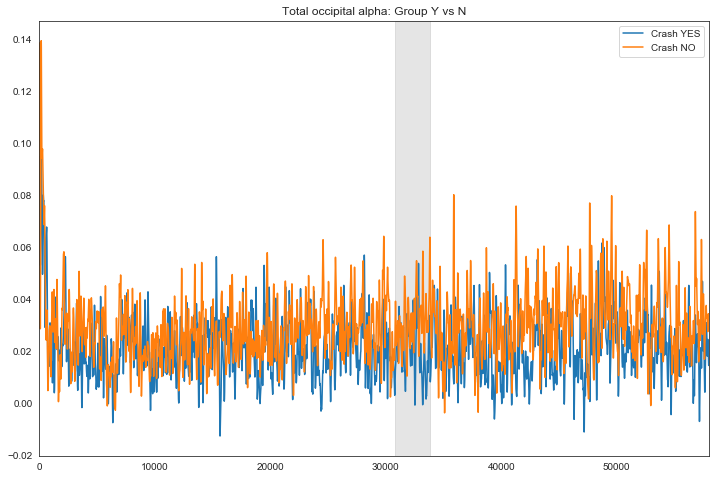

In [37]:

result = pd.DataFrame({
                      'Crash YES': ocy[:58000],
                       #'recall NO 1': ns1,
                      #  'recall NO 2': ns2,
                      #  'recall NO 3': ns3,
                        'Crash NO': ocn4[:58000],
                        #'recall NO 5': ns5,
})

sns.set_style("white")
result.plot(title="Total occipital alpha: Group Y vs N")


plt.axvspan(30832, 33832, color='gray', alpha=0.2)



plt.gcf().set_size_inches(12,8)

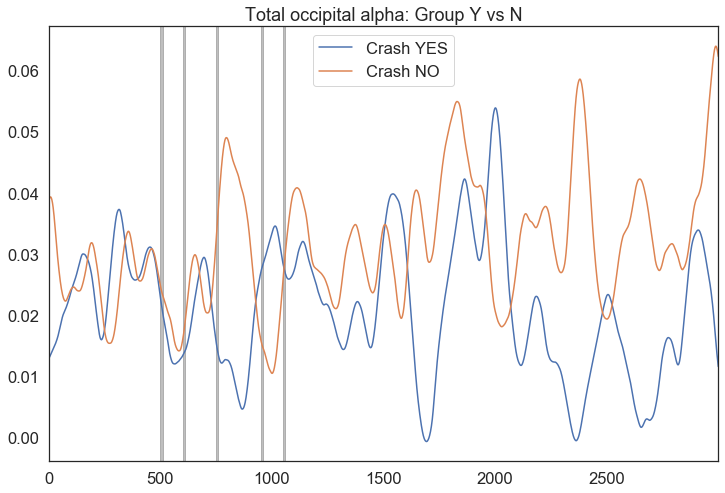

In [53]:

result = pd.DataFrame({
                      'Crash YES': ocy[30832:33832],
                       #'recall NO 1': ns1,
                      #  'recall NO 2': ns2,
                      #  'recall NO 3': ns3,
                        'Crash NO': ocn4[30832:33832],
                        #'recall NO 5': ns5,
})

sns.set_style("white")
result.plot(title="Total occipital alpha: Group Y vs N")


plt.axvspan(30832, 33832, color='gray', alpha=0.2)


plt.axvspan(500, 510, color='gray', alpha=0.5)
plt.axvspan(600, 610, color='gray', alpha=0.5)
plt.axvspan(750, 760, color='gray', alpha=0.5)
plt.axvspan(950, 960, color='gray', alpha=0.5)
plt.axvspan(1050, 1060, color='gray', alpha=0.5)




plt.gcf().set_size_inches(12,8)

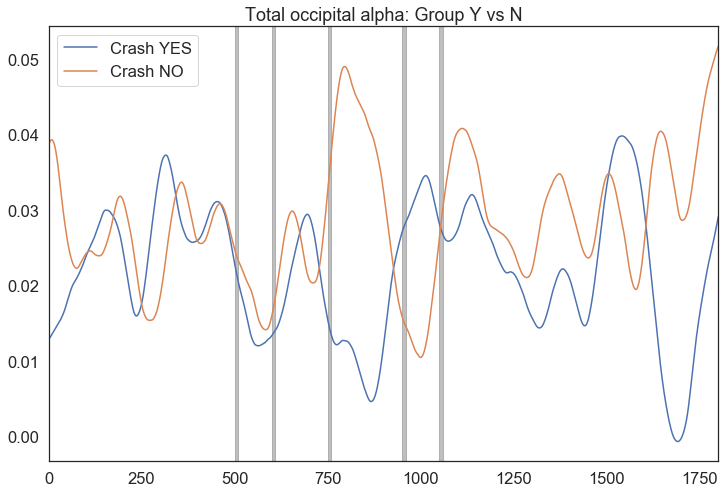

In [54]:

result = pd.DataFrame({
                      'Crash YES': ocy[30832:32634],
                       #'recall NO 1': ns1,
                      #  'recall NO 2': ns2,
                      #  'recall NO 3': ns3,
                        'Crash NO': ocn4[30832:32634],
                        #'recall NO 5': ns5,
})

sns.set_style("white")
result.plot(title="Total occipital alpha: Group Y vs N")


plt.axvspan(30832, 33832, color='gray', alpha=0.2)


plt.axvspan(500, 510, color='gray', alpha=0.5)
plt.axvspan(600, 610, color='gray', alpha=0.5)
plt.axvspan(750, 760, color='gray', alpha=0.5)
plt.axvspan(950, 960, color='gray', alpha=0.5)
plt.axvspan(1050, 1060, color='gray', alpha=0.5)




plt.gcf().set_size_inches(12,8)

In [55]:
y1=y[30832:32634].reset_index(drop=True)
n41=n4[30832:32634].reset_index(drop=True)

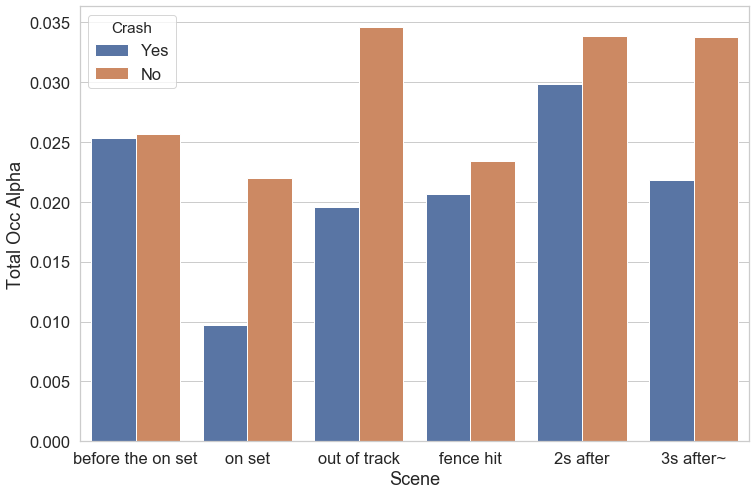

In [56]:
df=pd.DataFrame()
df['Total Occ Alpha'] = (y1.occ_blocking[0:500].mean(),y1.occ_blocking[500:600].mean(),y1.occ_blocking[600:750].mean(),y1.occ_blocking[750:950].mean(),y1.occ_blocking[950:1050].mean(),y1.occ_blocking[1050:].mean())
df['Scene'] =('before the on set','on set', 'out of track','fence hit','2s after','3s after~')
df['Crash']=('Yes')

dfn=pd.DataFrame()
dfn['Total Occ Alpha']= (n41.occ_blocking[0:500].mean(),n41.occ_blocking[500:600].mean(),n41.occ_blocking[600:750].mean(),n41.occ_blocking[750:950].mean(),n41.occ_blocking[950:1050].mean(),n41.occ_blocking[1050:].mean())
dfn['Scene'] =('before the on set','on set', 'out of track','fence hit','2s after','3s after~')
dfn['Crash']=('No')

a=pd.concat([df,dfn])

sns.set(style="whitegrid",font_scale=1.5)

ax = sns.barplot(x="Scene", y="Total Occ Alpha",hue="Crash", data=a)

plt.gcf().set_size_inches(12,8)

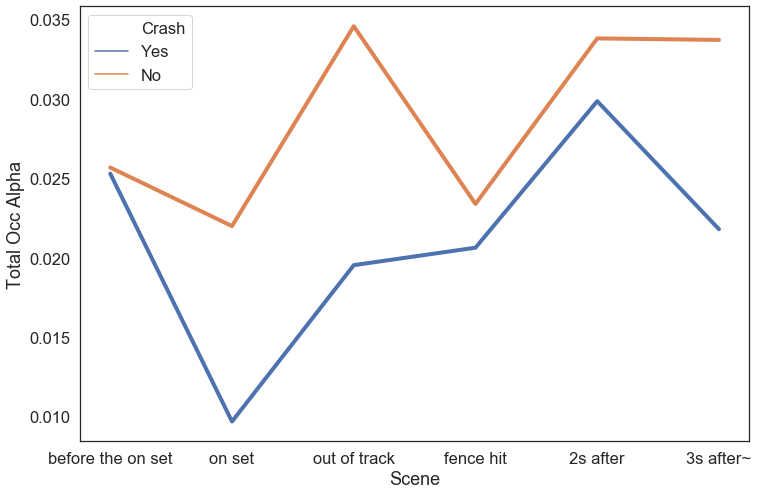

In [57]:
sns.set(style="white",font_scale=1.5)
ax = sns.lineplot(x="Scene", y="Total Occ Alpha",hue="Crash", data=a, sort=False, linewidth=4)
plt.gcf().set_size_inches(12,8)

## 4. Left Frontal. Alpha Blocking

In [59]:
N=150
lfy=smooth(y.fp1_alpha,window_len=N,window='hanning')
#lfn1=smooth(n1.fp1_alpha,window_len=N,window='hanning')
#lfn2=smooth(n2.fp1_alpha,window_len=N,window='hanning')
#lfn3=smooth(n3.fp1_alpha,window_len=N,window='hanning')
lfn4=smooth(n4.fp1_alpha,window_len=N,window='hanning')
#lfn5=smooth(n5.fp1_alpha,window_len=N,window='hanning')

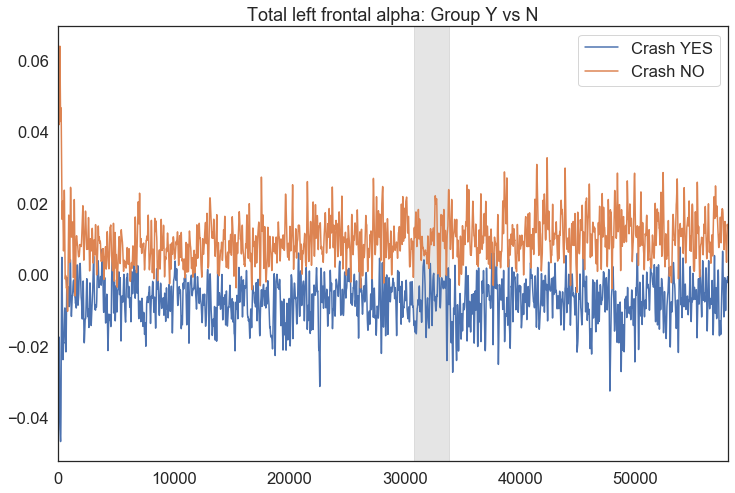

In [63]:

result = pd.DataFrame({
                      'Crash YES': lfy[:58000],
                       #'recall NO 1': ns1,
                      #  'recall NO 2': ns2,
                      #  'recall NO 3': ns3,
                        'Crash NO': lfn4[:58000],
                        #'recall NO 5': ns5,
})

sns.set_style("white")
result.plot(title="Total left frontal alpha: Group Y vs N")
plt.axvspan(30832, 33832, color='gray', alpha=0.2)


plt.gcf().set_size_inches(12,8)

In [66]:
y1['fp_blocking']=y1.fp1_alpha
n41['fp_blocking']=n41.fp1_alpha

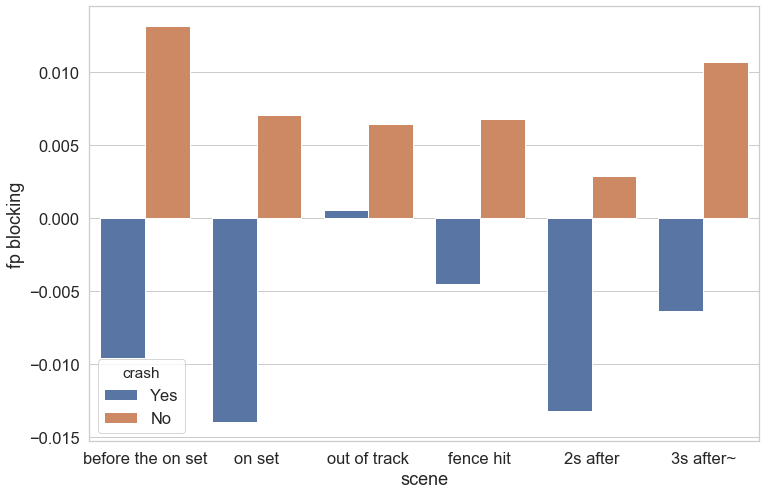

In [68]:
df=pd.DataFrame()
df['fp blocking'] = (y1.fp_blocking[0:500].mean(),y1.fp_blocking[500:600].mean(),y1.fp_blocking[600:750].mean(),y1.fp_blocking[750:950].mean(),y1.fp_blocking[950:1050].mean(),y1.fp_blocking[1050:].mean())
df['scene'] =('before the on set','on set', 'out of track','fence hit','2s after','3s after~')
df['crash']=('Yes')

dfn=pd.DataFrame()
dfn['fp blocking']= (n41.fp_blocking[0:500].mean(),n41.fp_blocking[500:600].mean(),n41.fp_blocking[600:750].mean(),n41.fp_blocking[750:950].mean(),n41.fp_blocking[950:1050].mean(),n41.fp_blocking[1050:].mean())
dfn['scene'] =('before the on set','on set', 'out of track','fence hit','2s after','3s after~')
dfn['crash']=('No')

a=pd.concat([df,dfn])

sns.set(style="whitegrid",font_scale=1.5)

ax = sns.barplot(x="scene", y="fp blocking",hue="crash", data=a)

plt.gcf().set_size_inches(12,8)

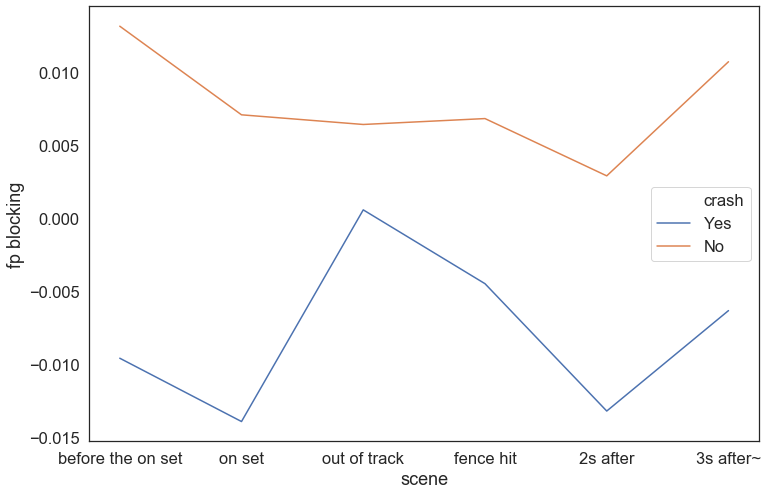

In [69]:
sns.set(style="white",font_scale=1.5)

ax = sns.lineplot(x="scene", y="fp blocking",hue="crash", data=a,sort=False)

plt.gcf().set_size_inches(12,8)

## 5. Frontal Dominance

In [33]:
y.head()

,o1_alpha,o2_alpha,fp1_alpha,fp2_alpha,occ_blocking,occ_asymmetry,fp_asymmetry,index
0,-0.217358,-0.037948,-0.000099,0.008588,-0.255306,-0.702723,1.023363,30332
1,-0.244282,-0.049190,-0.150250,0.169343,-0.293472,-0.664772,16.738735,30333
2,-0.182536,-0.515839,-0.365121,-0.087001,-0.698375,0.477256,-0.615144,30334
3,-0.056351,-0.109338,-0.084976,-0.107840,-0.165689,0.319800,0.118581,30335
4,0.046002,0.108742,-0.172573,-0.153664,0.154744,0.405442,-0.057961,30336


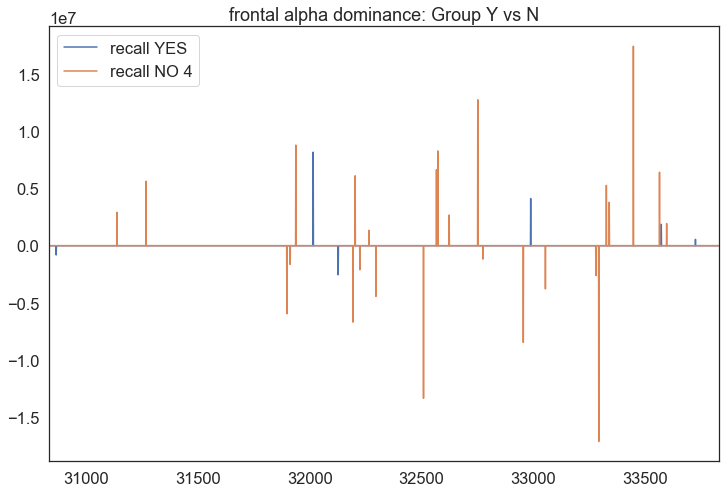

In [72]:

result = pd.DataFrame({
                      'recall YES': y.fp_asymmetry[30832:33832],
                       #'recall NO 1': ns1,
                      #  'recall NO 2': ns2,
                      #  'recall NO 3': ns3,
                        'recall NO 4': n4.fp_asymmetry[30832:33832],
                        #'recall NO 5': ns5,
})

sns.set_style("white")
result.plot(title="frontal alpha dominance: Group Y vs N")

plt.axvspan(500, 510, color='red', alpha=0.3)
plt.axvspan(600, 610, color='red', alpha=0.3)
plt.axvspan(750, 760, color='red', alpha=0.3)
plt.axvspan(950, 960, color='red', alpha=0.3)
plt.axvspan(1050, 1060, color='red', alpha=0.3)

plt.gcf().set_size_inches(12,8)

In [89]:
df=pd.DataFrame()
df['Frontal Dominance'] = (y1.fp_asymmetry[500:600].mean(),y1.fp_asymmetry[600:750].mean(),y1.fp_asymmetry[750:950].mean(),y1.fp_asymmetry[950:1050].mean())
df['scene'] =('on set', 'out of track','fence hit','2s after')
df['crash']=('Y')

dfn=pd.DataFrame()
dfn['Frontal Dominance']= (n41.fp_asymmetry[500:600].mean(),n41.fp_asymmetry[600:750].mean(),n41.fp_asymmetry[750:950].mean(),n41.fp_asymmetry[950:1050].mean())
dfn['scene'] =('on set', 'out of track','fence hit','2s after')
dfn['crash']=('N')

a=pd.concat([df,dfn])

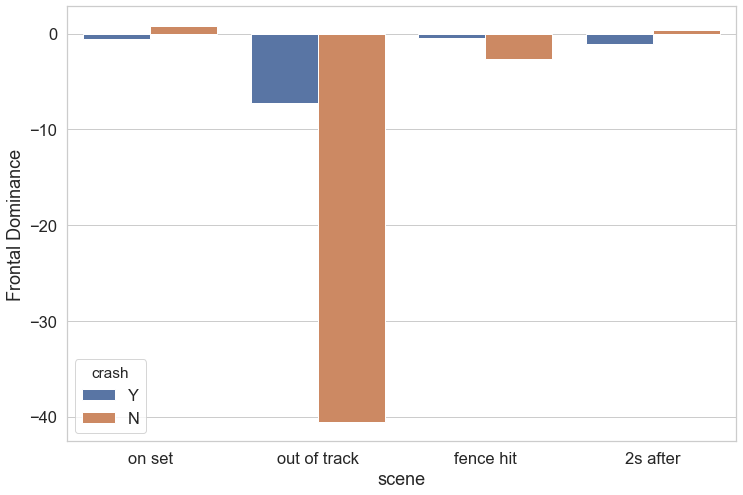

In [92]:
sns.set(style="whitegrid",font_scale=1.5)
ax = sns.barplot(x="scene", y='Frontal Dominance',hue="crash", data=a)
plt.gcf().set_size_inches(12,8)

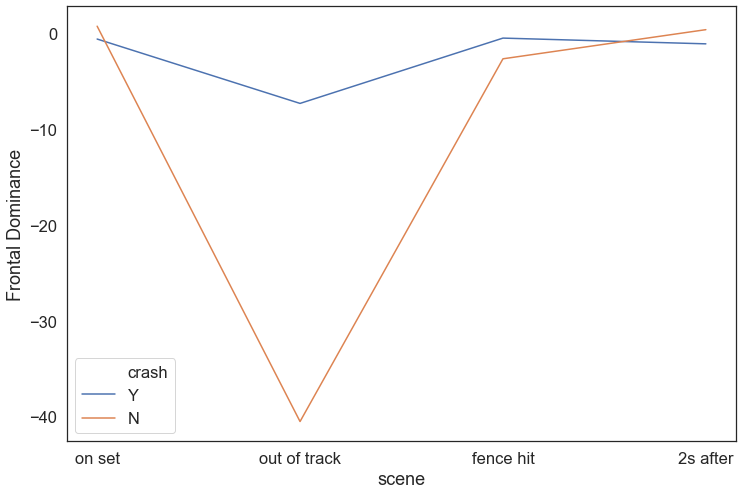

In [93]:
sns.set(style="white",font_scale=1.5)
ax = sns.lineplot(x="scene", y='Frontal Dominance',hue="crash", data=a,sort=False)
plt.gcf().set_size_inches(12,8)

## 6 Occ. Dominance

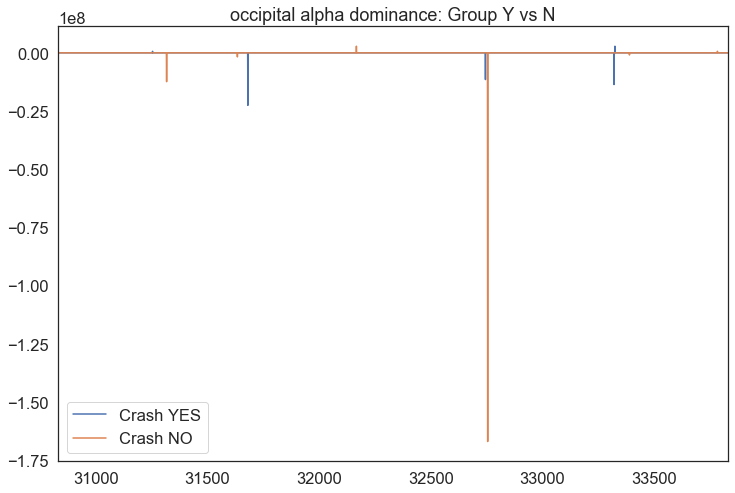

In [95]:

result = pd.DataFrame({
                      'Crash YES': y.occ_asymmetry[30832:33832],
                       #'recall NO 1': ns1,
                      #  'recall NO 2': ns2,
                      #  'recall NO 3': ns3,
                        'Crash NO': n4.occ_asymmetry[30832:33832],
                        #'recall NO 5': ns5,
})

sns.set_style("white")
result.plot(title="occipital alpha dominance: Group Y vs N")

plt.axvspan(500, 510, color='red', alpha=0.3)
plt.axvspan(600, 610, color='red', alpha=0.3)
plt.axvspan(750, 760, color='red', alpha=0.3)
plt.axvspan(950, 960, color='red', alpha=0.3)
plt.axvspan(1050, 1060, color='red', alpha=0.3)

plt.gcf().set_size_inches(12,8)

In [98]:
df=pd.DataFrame()
df['Occ Dominance'] = (y1.occ_asymmetry[:500].mean(),y1.occ_asymmetry[500:600].mean(),y1.occ_asymmetry[600:750].mean(),y1.occ_asymmetry[750:950].mean(),y1.occ_asymmetry[950:1050].mean(),y1.occ_asymmetry[1050:].mean())
df['scene'] =('before the on set','on set', 'out of track','fence hit','2s after','3s after~')
df['crash']=('Y')

dfn=pd.DataFrame()
dfn['Occ Dominance']= (n41.occ_asymmetry[:500].mean(),n41.occ_asymmetry[500:600].mean(),n41.occ_asymmetry[600:750].mean(),n41.occ_asymmetry[750:950].mean(),n41.occ_asymmetry[950:1050].mean(),n41.occ_asymmetry[1050:].mean())
dfn['scene'] =('before the on set','on set', 'out of track','fence hit','2s after','3s after~')
dfn['crash']=('N')

a=pd.concat([df,dfn])

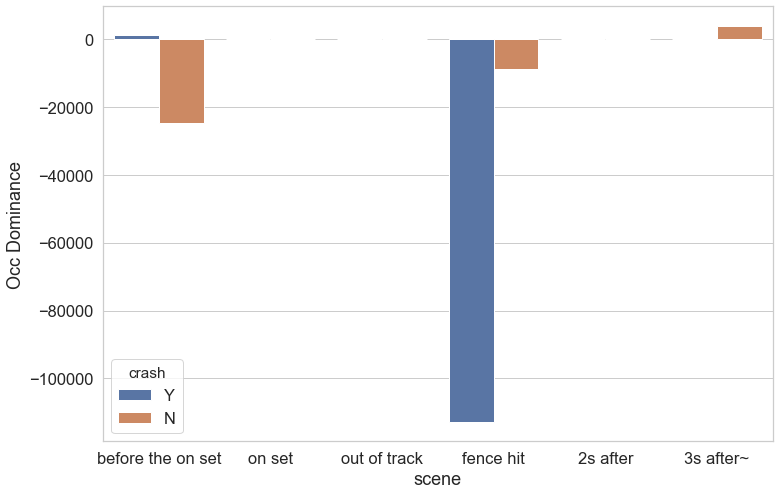

In [99]:
sns.set(style="whitegrid",font_scale=1.5)
ax = sns.barplot(x="scene", y="Occ Dominance",hue="crash", data=a)
plt.gcf().set_size_inches(12,8)

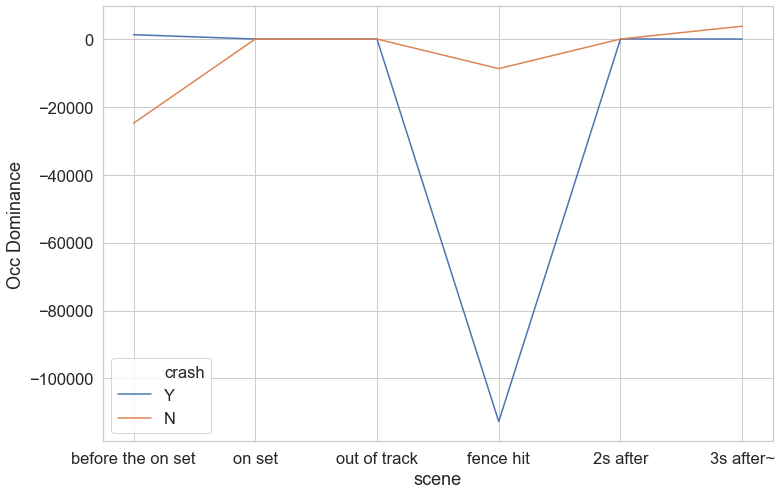

In [100]:
sns.set(style="whitegrid",font_scale=1.5)
ax = sns.lineplot(x="scene", y='Occ Dominance',hue="crash", data=a,sort=False)
plt.gcf().set_size_inches(12,8)

## END.